# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

## 1. Is the distribution of body temperatures normal?

In [2]:
# Define ecdf function
def ecdf(data):
      """Compute ECDF for a one-dimensional array of measurements."""

      # Number of data points: n
      n = len(data)

      # x-data for the ECDF: x
      x = np.sort( data )

      # y-data for the ECDF: y
      y = np.arange(1, n+1) / n

      return x, y

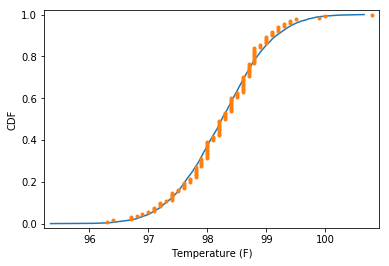

In [3]:
# Compute mean and standard deviation: mu, sigma
temperatures = df['temperature']
mu = np.mean(temperatures)
sigma = np.std(temperatures)
    
# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temperatures)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

The plot visually suggests that temperature is normally distributed.

In [4]:
# Normal test for temperature distribution
print('Null hypothesis: the body temperature is normally distributed')
k2 , p = stats.normaltest(x)
alpha = 1e-3
print('Chi Squared = ', k2)
print("p_value = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Null hypothesis: the body temperature is normally distributed
Chi Squared =  2.70380143332
p_value = 0.258748
The null hypothesis cannot be rejected


## 2. Is the sample size large? Are the observations independent?

The length of the sample is:  130
The sample size is sufficiently large for CLT to hold
----------------------------------------------


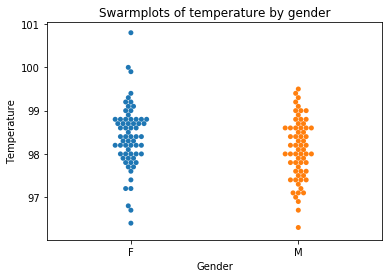

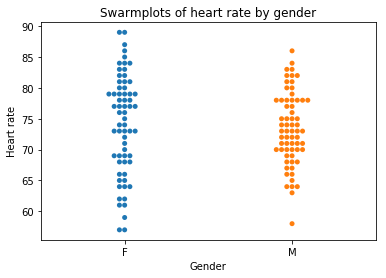

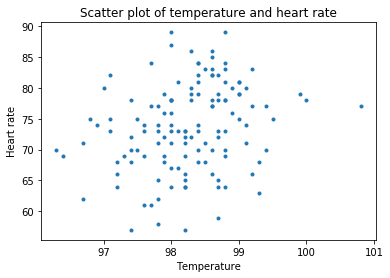


The plots visually suggest that the observations are independent.
----------------------------------------------
The correlation between temperature and heart rate is low ( 0.253656402721 ) --> observations appear to be independent


In [5]:
print('The length of the sample is: ', len(df))
if len(df) >= 30:
    print('The sample size is sufficiently large for CLT to hold')
else:
    print('The sample size is not sufficiently large for CLT to hold')

print('----------------------------------------------')

# Create swarmplots of gender and temperature
_ = sns.swarmplot(x='gender' ,y='temperature', data= df)

# Label the axes
_ = plt.title('Swarmplots of temperature by gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')

plt.show()

# Create swarmplots of gender and temperature
_ = sns.swarmplot(x='gender' ,y='heart_rate', data= df)

# Label the axes
_ = plt.title('Swarmplots of heart rate by gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Heart rate')

plt.show()

# Create scatter plot of temperature and heart rate
_ = plt.plot(df['temperature'] ,df['heart_rate'], marker='.', linestyle='none')

# Label the axes
_ = plt.title('Scatter plot of temperature and heart rate')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Heart rate')

plt.show()

print('')
print('The plots visually suggest that the observations are independent.')
print('----------------------------------------------')
pearson_corr_mat = np.corrcoef(df['temperature'] ,df['heart_rate'])
print('The correlation between temperature and heart rate is low (', pearson_corr_mat[0,1] ,') --> observations appear to be independent')

## 3. Is the true population mean really 98.6 degrees F?

This would use a one sample test since there is 1 sample of temperature in the df, the mean 98.6 ∘ F from the study (no 2nd sample of data). The test statistic used will be the Z statistic since the distribution was found to be normal and the sample size is large. 

In [6]:
print('The null hypothesis is that the true population mean is really 98.6 F')

# Calculate the mean and standard deviation 
mu = np.mean(temperatures)
sigma = np.std(temperatures)
print('The sample mean is ',mu ,'and the sample standard deviation is', sigma)

# calculate statistic
z_t_statistic = (98.6- mu)/ (sigma / (len (temperatures)**0.5) )

# read table and draw conclusion
print('A temperature of 98.6 has a Z statistic of ',z_t_statistic, ', the normal distribution probability of such an extreme value is 0.0000' ) 
print('A temperature of 98.6 has a T statistic of ',z_t_statistic, ', a t distribution confidence of 0.0005 for 100 degrees of freedom is a t score of 3.390',  )

print('It is unlikely that the true population mean of the sample provided is 98.6 F.')

The null hypothesis is that the true population mean is really 98.6 F
The sample mean is  98.2492307692 and the sample standard deviation is 0.730357778905
A temperature of 98.6 has a Z statistic of  5.47592520208 , the normal distribution probability of such an extreme value is 0.0000
A temperature of 98.6 has a T statistic of  5.47592520208 , a t distribution confidence of 0.0005 for 100 degrees of freedom is a t score of 3.390
It is unlikely that the true population mean of the sample provided is 98.6 F.


In [7]:
# Test using bootstrap replicates  
# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
  # Generate bootstrap sample
  bs_sample = np.random.choice(temperatures, size=len(temperatures))
  # Compute replicate
  bs_replicates[i] = np.mean(bs_sample)

# Compute and print 95% confidence interval and the p-value: p
interval = np.percentile(bs_replicates, [2.5, 97.5])
print('The 95% confidence interval is ', interval)

p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-val =', p)

The 95% confidence interval is  [ 98.12459615  98.37540385]
p-val = 0.0


It is unlikely that the true population mean of the sample provided is 98.6 F. 

## 4. Draw a small sample of size 10 from the data and repeat both tests.

In [8]:
# seed and draw sample
np.random.seed(42)
bs_sample_10 = np.random.choice(temperatures, size=10)

# calculate statistic
z_t_statistic_10 = (98.6- np.mean(bs_sample_10))/ (np.std(bs_sample_10) / (10**0.5) )

# read table and draw conclusion
print('A temperature of 98.6 has a Z statistic of ',round(z_t_statistic_10,2), ', the normal distribution probability of such an extreme value is ~0.0006' ) 
print('A temperature of 98.6 has a T statistic of ',round(z_t_statistic_10,2), ', a t distribution for 9 degrees of freedom has a t score of 3.250 for confidence of 0.005',  )

print('It is unlikely that the true population mean of the sample provided is 98.6 F.')

A temperature of 98.6 has a Z statistic of  3.26 , the normal distribution probability of such an extreme value is ~0.0006
A temperature of 98.6 has a T statistic of  3.26 , a t distribution for 9 degrees of freedom has a t score of 3.250 for confidence of 0.005
It is unlikely that the true population mean of the sample provided is 98.6 F.


Both samples (of size 100 and of 10) suggest that the probability of the true population mean being 98.6 degrees F is low (regardless of statistic used. 
For large sample sizes, the normal distribution should be used and hence the Z statistic. For smaller sample sizes, the t distribution should be used and hence the T statistic. 

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [9]:
# a one tail confidence interval of the normal distribution
print('95% confidence interval has a z-score of 1.65 this translates to a max temperature of ', round(1.65 * (sigma / (len (temperatures)**0.5) ) + mu, 2),'F')
print('99% confidence interval has a z-score of 2.33 this translates to a max temperature of ', round(2.33 * (sigma / (len (temperatures)**0.5) ) + mu, 2),'F')
print('99.5% confidence interval has a z-score of 2.58 this translates to a max temperature of ', round(2.58 * (sigma / (len (temperatures)**0.5) ) + mu, 2),'F')

95% confidence interval has a z-score of 1.65 this translates to a max temperature of  98.35 F
99% confidence interval has a z-score of 2.33 this translates to a max temperature of  98.4 F
99.5% confidence interval has a z-score of 2.58 this translates to a max temperature of  98.41 F


In [10]:
# a one tail confidence interval of the normal distribution
print('95% confidence interval has a z-score of 1.65 this translates to a max temperature of ', round(1.65 * (sigma ) + mu, 2),'F')
print('99% confidence interval has a z-score of 2.33 this translates to a max temperature of ', round(2.33 * (sigma ) + mu, 2),'F')
print('99.5% confidence interval has a z-score of 2.58 this translates to a max temperature of ', round(2.58 * (sigma ) + mu, 2),'F')

95% confidence interval has a z-score of 1.65 this translates to a max temperature of  99.45 F
99% confidence interval has a z-score of 2.33 this translates to a max temperature of  99.95 F
99.5% confidence interval has a z-score of 2.58 this translates to a max temperature of  100.13 F


if we assume abnormal can mean both low and high temperatures then we should do a two tail confident interval

In [11]:
# a two tail confidence interval of the normal distribution
print('95% confidence interval has a z-score of ±1.96 this translates to a temperature range of ', round( mu - 1.96 * (sigma / (len (temperatures)**0.5)) , 2), ' to ', round(1.96 * (sigma / (len (temperatures)**0.5)) + mu, 2),'F')
print('99% confidence interval has a z-score of ±2.58 this translates to a max temperature of ', round(mu - 2.58 * (sigma / (len (temperatures)**0.5)), 2), ' to ', round(2.58 * (sigma / (len (temperatures)**0.5)) + mu, 2),'F')
print('99.5% confidence interval has a z-score of ±2.81 this translates to a max temperature of ', round(mu - 2.81 * (sigma / (len (temperatures)**0.5)), 2), ' to ', round(2.81 * (sigma / (len (temperatures)**0.5)) + mu, 2),'F')

95% confidence interval has a z-score of ±1.96 this translates to a temperature range of  98.12  to  98.37 F
99% confidence interval has a z-score of ±2.58 this translates to a max temperature of  98.08  to  98.41 F
99.5% confidence interval has a z-score of ±2.81 this translates to a max temperature of  98.07  to  98.43 F


In [12]:
# a two tail confidence interval of the normal distribution
print('95% confidence interval has a z-score of ±1.96 this translates to a temperature range of ', round( mu - 1.96 * (sigma ) , 2), ' to ', round(1.96 * (sigma ) + mu, 2),'F')
print('99% confidence interval has a z-score of ±2.58 this translates to a max temperature of ', round(mu - 2.58 * (sigma ), 2), ' to ', round(2.58 * (sigma ) + mu, 2),'F')
print('99.5% confidence interval has a z-score of ±2.81 this translates to a max temperature of ', round(mu - 2.81 * (sigma ), 2), ' to ', round(2.81 * (sigma ) + mu, 2),'F')

95% confidence interval has a z-score of ±1.96 this translates to a temperature range of  96.82  to  99.68 F
99% confidence interval has a z-score of ±2.58 this translates to a max temperature of  96.36  to  100.13 F
99.5% confidence interval has a z-score of ±2.81 this translates to a max temperature of  96.2  to  100.3 F


## 6. Is there a significant difference between males and females in normal temperature?

In [13]:
# separate datasets
males = df.temperature[df['gender']=='M']
females = df.temperature[df['gender']=='F']

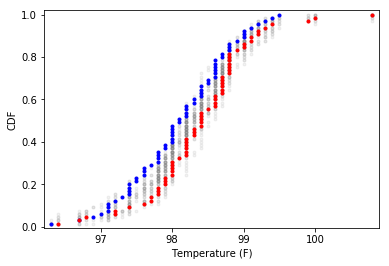

Females appear to have a higher body temperature than males


In [14]:
# get ecdf's from male and female samples
x_m, y_m = ecdf(males)
x_f, y_f = ecdf(females)

# using a null hypothesis that both male and females have the same temperatures

for i in range(20):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temperatures, size=len(males))
    x_theor, y_theor = ecdf(bs_sample)
    # plot theoretical values of a sample where males and females have the same temperature distribution
    _ = plt.plot(x_theor, y_theor, marker='.', linestyle='none', color='grey', alpha=0.1)
    
# plot actual ecdfs
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
plt.margins(0.02)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
plt.show()

print('Females appear to have a higher body temperature than males')
    

In [15]:
## permutation test looking at the difference in mean of the two datasets 
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean temperature from both genders
empirical_diff_means = diff_of_means(females, males)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(females, males, 
                               diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)
print('The low p value suggests that females have a statistically significantly higher body temperature than males')

p-value = 0.0112
The low p value suggests that females have a statistically significantly higher body temperature than males


In [16]:
print( np.mean(females) )

98.3938461538


In [17]:
print( np.mean(males) )

98.1046153846


In [19]:
print( np.mean(temperatures) )

98.2492307692
